# Install Required Packages

In [ ]:
pip install pandas
pip install scikit-learn
pip install matplotlib

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 4.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.5 MB 5.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/11.5 MB 6.0 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.5 MB 6.5 MB/s eta 0:00:01
   ------------------------ --------------- 7.1/11.5 MB 7.1 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 7.2 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 7.2 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/12.6 MB 9.0 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.6 MB 9.4 MB/s eta 0:00:01
   --------

In [1]:
import pandas as pd
import numpy as np

In [9]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows of the DataFrame
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [14]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [22]:
print(iris_df.info())
iris_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Relationship between Sepal Length and Sepal Width

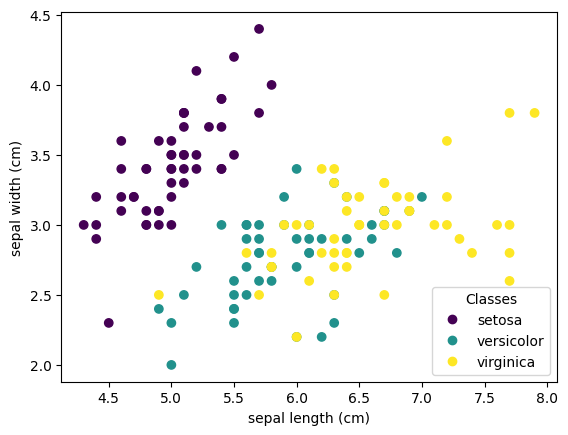

In [6]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

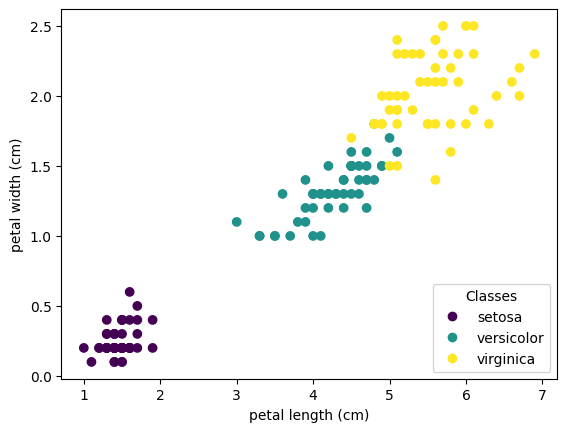

In [18]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

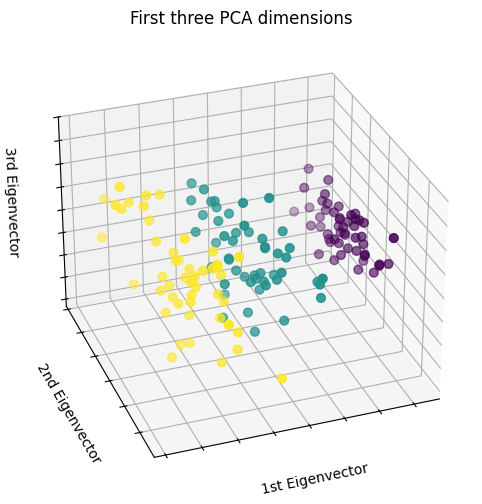

In [17]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [31]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [26]:
X_train, X_test, y_train, y_test = train_test_split(iris_df,iris.target,test_size=0.2,random_state=42)

# K-Nearest Neighbours

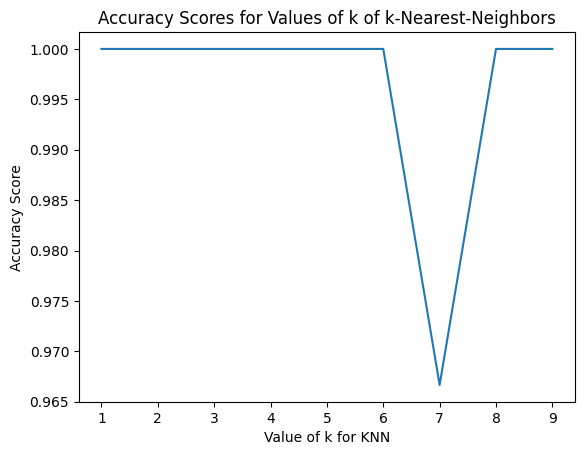

In [29]:
# experimenting with different n values
k_range = list(range(1,10))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# K-means Clustering

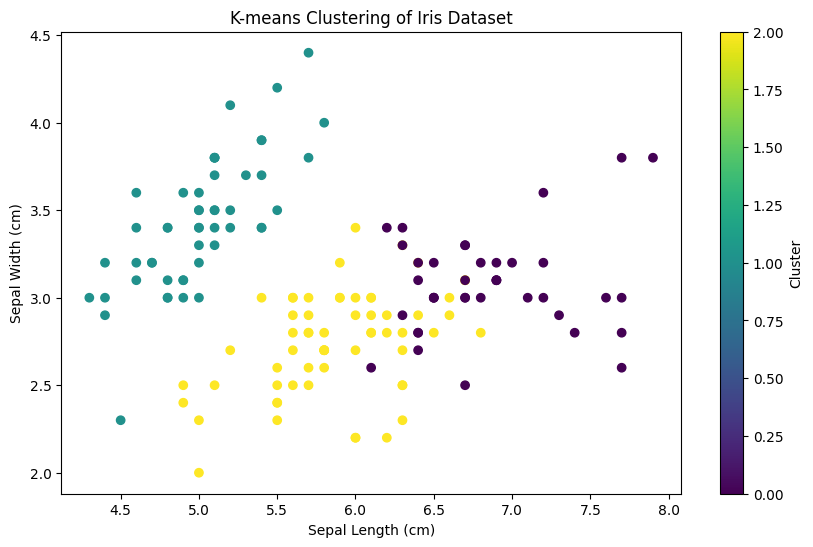

In [46]:

# Implement K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['Cluster'] = kmeans.fit_predict(iris.data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Cluster')
plt.show()


Evaluating the clustering results involves several methods and metrics to determine how well the clustering algorithm has performed. Here are some common techniques to evaluate clustering results:

1. Silhouette Score:
The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a higher value indicates better clustering.

2. Inertia (Within-Cluster Sum of Squares):
Inertia measures the sum of squared distances between each point and the centroid of its cluster. Lower inertia indicates better clustering.

3. Adjusted Rand Index (ARI):
The ARI measures the similarity between the true labels and the clustering labels, adjusted for chance. It ranges from -1 to 1, where 1 indicates perfect clustering.

4. Davies-Bouldin Index:
The Davies-Bouldin index measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.

In [47]:

from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

# Calculate evaluation metrics
silhouette_avg = silhouette_score(iris.data, iris_df['Cluster'])
inertia = kmeans.inertia_
ari = adjusted_rand_score(iris.target, iris_df['Cluster'])
davies_bouldin = davies_bouldin_score(iris.data, iris_df['Cluster'])

# Print evaluation metrics
print(f'Silhouette Score: {silhouette_avg}')
print(f'Inertia: {inertia}')
print(f'Adjusted Rand Index: {ari}')
print(f'Davies-Bouldin Index: {davies_bouldin}')


Silhouette Score: 0.551191604619592
Inertia: 78.8556658259773
Adjusted Rand Index: 0.7163421126838476
Davies-Bouldin Index: 0.6660385791628493


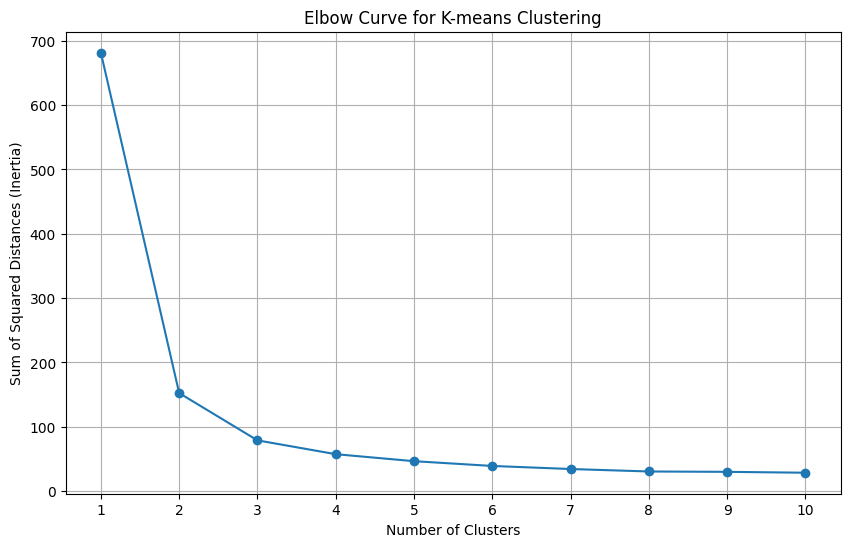

In [48]:

# Calculate the sum of squared distances for different number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris.data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Curve for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


# Logistic Regression

In [50]:
model = LogisticRegression()
model.fit(X_train,y_train)
print('Training Accuracy Sepal = {}'.format(model.score(X_train, y_train)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test, y_test)))

Training Accuracy Sepal = 0.975
Testing  Accuracy Sepal = 1.0
